In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/cardata.csv


                                  Regression****

Car_Name: Name of the cars

Year: Year of the car when it was bought

Selling_price: Price at which the car is being sold

Kms_Driven: Number of Kilometres the car is driven

Fuel_Type: Fuel type of car(petrol/diesel/CNG/LPG/electric)

Seller_Type: Tells if a seller is idividual or a dealer

Transmission: Gear transmision of the car(Automatic/Manual)

Owner: Number of previous owners of the car




In [2]:
#import libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#warnings.simplefilter(action = 'ignore')
plt.style.use('seaborn')
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
#داده را ایمپورت می کنیم
Data = pd.read_csv("../input/car-data/cardata.csv")
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# یک دیتافریم درست می کنیم
df = pd.DataFrame(Data)

In [5]:
df.shape

(301, 9)

In [6]:
#می خواهیم ده سطر اول دیتاست را مشاهده کنیم
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
#اطلاعات خوبی از دیتاست به ما میدهد
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# میخواهیم بررسی کنیم که هر کدام از ستون ها چه قدر میسینگ ولیو دارد
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#ستون نام ماشین را حذف می کنیم
df.drop("Car_Name", axis=1, inplace=True)

In [10]:
#ستون سن را به دیتافریم اضافه می کنیم
df.insert(1, "age", "Any")

In [11]:
#سال 2019 را از سال موجود در ستون سال کم می کنید می شود سن ماشین

#ستون سن را مقدار دهی می کنیم
df['age'] = np.where(df['age'] == 'Any', 2019- df['Year']  , df['Year'])

In [12]:
df.describe(include='all')

,Year,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [13]:
# میسینگ ولیوها را حذف می کنیم. هر چند که این دیتافریم میسینگ ولیو ندارد
df.dropna()

,Year,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
#جزئیات دیتا را مشاهده می کنیم
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# نوع ستون های دیتافریم را مشاهده می کنیم
display(df.dtypes)

Year               int64
age                int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

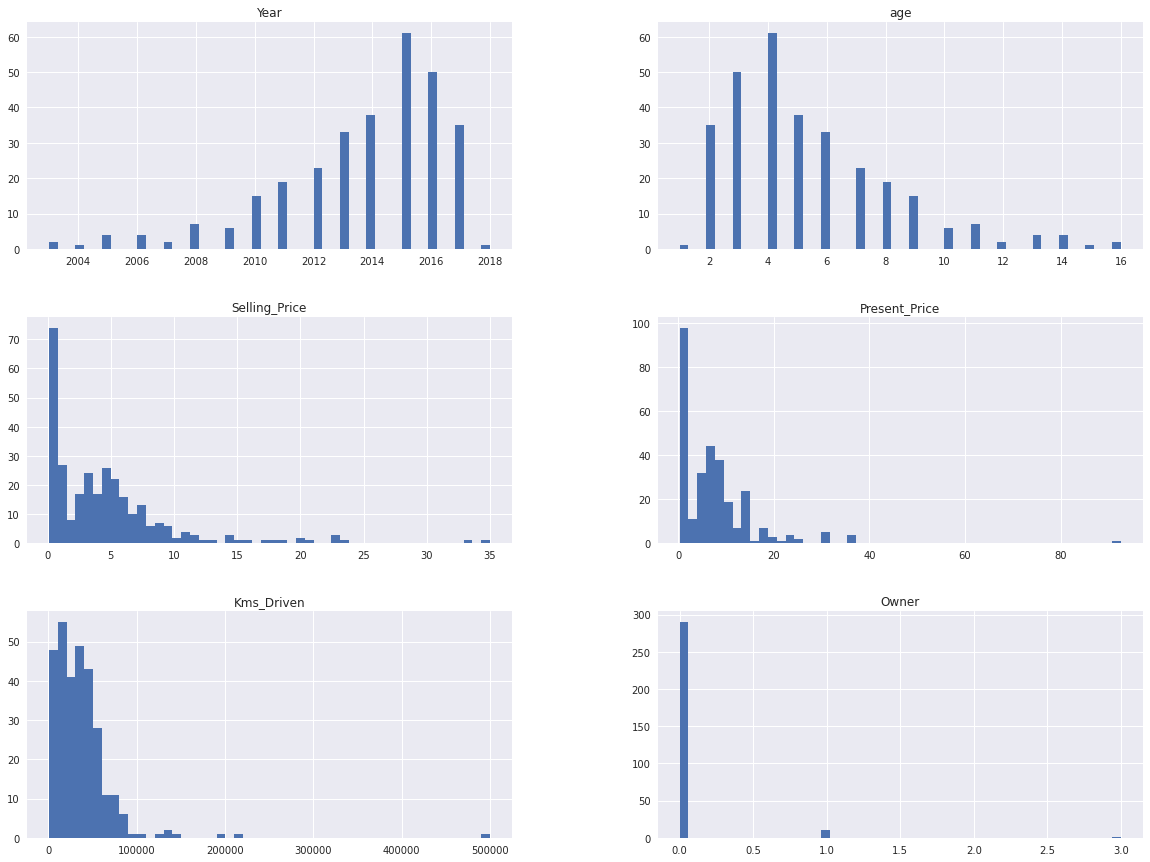

In [16]:
#نمودار هیستوگرام تک تک ستون ها را مشاهده می کنیم
#histogram
df.hist(bins=50,figsize=(20,15))
plt.show()

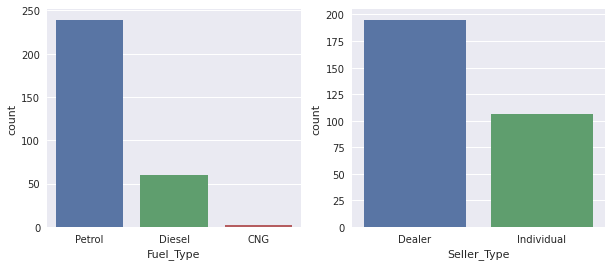

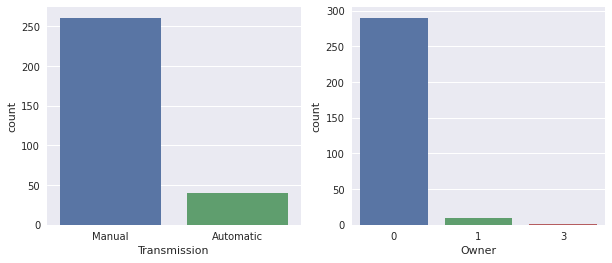

In [17]:
# برای ستون های کتگوریکال پلات از طریق سیبرن رسم می کنیم
categorical = ["Fuel_Type","Seller_Type","Transmission","Owner"]
i = 0
while i <4:
    fig = plt.figure(figsize =[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x =categorical[i], data = Data )
    i +=1
    plt.subplot(1,2,2)
    sns.countplot(x =categorical[i], data = Data )
    i+=1
    plt.show()

In [18]:
#correlation
Data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [19]:
# داده ها را براساس ستون سال سورت می کنیم
df.sort_values(by=["Year"])

,Year,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,16,0.35,2.28,127000,Petrol,Individual,Manual,0
39,2003,16,2.25,7.98,62000,Petrol,Dealer,Manual,0
77,2004,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
54,2005,14,2.75,10.21,90000,Petrol,Individual,Manual,0
84,2005,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
104,2017,2,1.35,1.47,4100,Petrol,Individual,Manual,0
265,2017,2,6.50,8.70,21200,Petrol,Dealer,Manual,0
66,2017,2,19.75,23.15,11000,Petrol,Dealer,Automatic,0
134,2017,2,0.65,0.81,11800,Petrol,Individual,Manual,0


<function matplotlib.pyplot.show(close=None, block=None)>

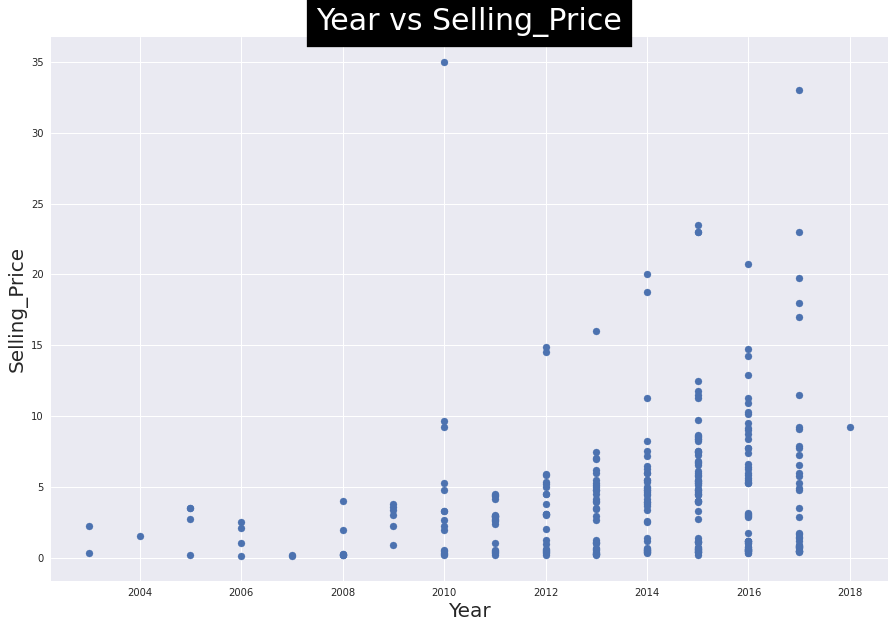

In [20]:
#نمودار بین سال و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Year"] , df["Selling_Price"])
plt.title("Year vs Selling_Price", backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [21]:
#داده ها را بر اساس ستون سن سورت می کنیم
df.sort_values(by=["age"])

,Year,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,2018,1,9.25,9.83,2071,Diesel,Dealer,Manual,0
64,2017,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0
128,2017,2,0.80,0.87,3000,Petrol,Individual,Manual,0
220,2017,2,3.50,4.43,38488,Petrol,Dealer,Manual,0
126,2017,2,0.90,0.95,1300,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
92,2005,14,3.51,13.70,75000,Petrol,Dealer,Manual,0
84,2005,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
77,2004,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
37,2003,16,0.35,2.28,127000,Petrol,Individual,Manual,0


<function matplotlib.pyplot.show(close=None, block=None)>

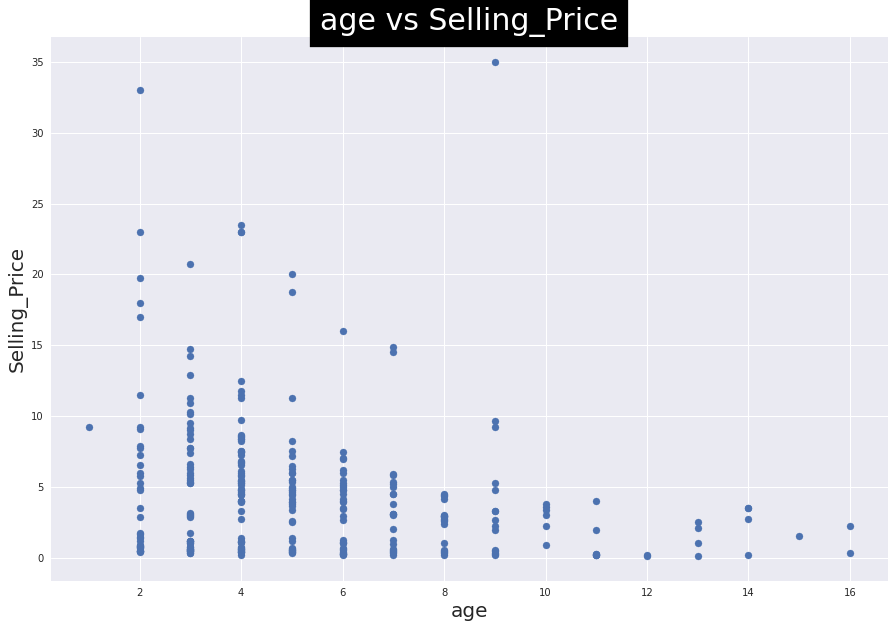

In [22]:
#نمودار سن و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["age"] , df["Selling_Price"])
plt.title("age vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("age", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [23]:
#ستون سن و سال ماشین یک مفهم رو می رساند و حتی کرولیشن ها کاملا برابر هست فقط یکی منفی و یکی مثبت است
#بنابراین ستون سال را حذف می کنیم
df.drop("Year", axis=1, inplace=True)

In [24]:
# داده ها را براساس قیمت خرید سورت می کنیم
df.sort_values(by=["Present_Price"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
195,4,0.18,0.32,35000,Petrol,Individual,Manual,0
183,6,0.27,0.47,21000,Petrol,Individual,Manual,0
181,3,0.30,0.48,50000,Petrol,Individual,Manual,0
187,6,0.25,0.51,32000,Petrol,Individual,Manual,0
180,7,0.30,0.51,60000,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
59,5,19.99,35.96,41000,Diesel,Dealer,Automatic,0
63,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
62,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0
64,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0


<function matplotlib.pyplot.show(close=None, block=None)>

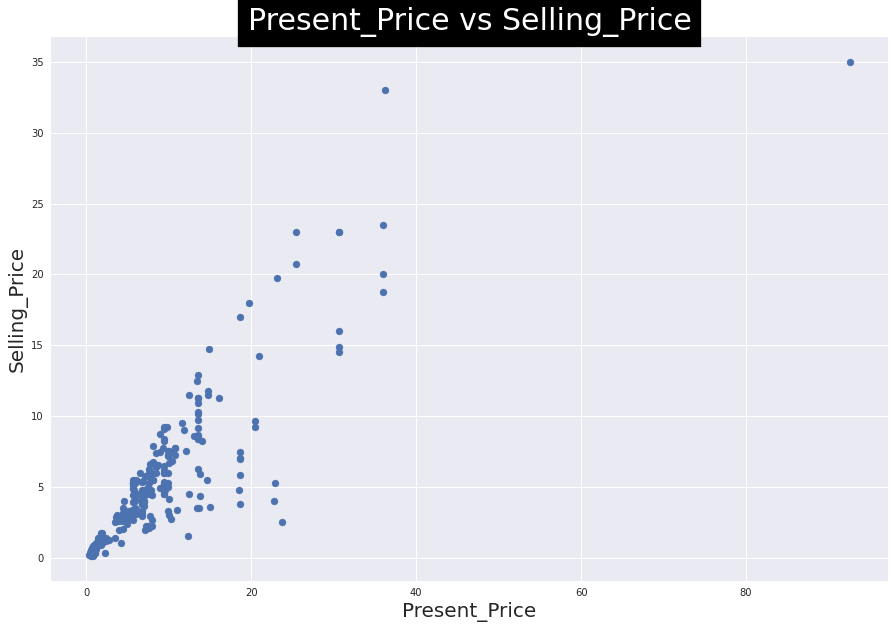

In [25]:
#نمودار بین قیمت خرید و قیمت الان را رسم می کنیم
# همان طور که از نمودار مشخص است با افزایش قیمت قبلی قیمت جدید هم افزایش پیدا می کند، ارتباط مستقیمی دارند
plt.figure(figsize =(15,10))
plt.scatter(df["Present_Price"] , df["Selling_Price"])
plt.title("Present_Price vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Present_Price", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [26]:
# داده ها را براساس کیلومتر کارکرد سورت می کنیم
df.sort_values(by=["Kms_Driven"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
133,3,0.72,0.95,500,Petrol,Individual,Manual,0
165,3,0.45,0.54,500,Petrol,Individual,Automatic,0
166,3,0.45,0.55,1000,Petrol,Individual,Manual,0
103,2,1.45,1.60,1200,Petrol,Individual,Manual,0
126,2,0.90,0.95,1300,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
77,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
85,13,2.50,23.73,142000,Petrol,Individual,Automatic,3
84,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,9,0.31,1.05,213000,Petrol,Individual,Manual,0


<function matplotlib.pyplot.show(close=None, block=None)>

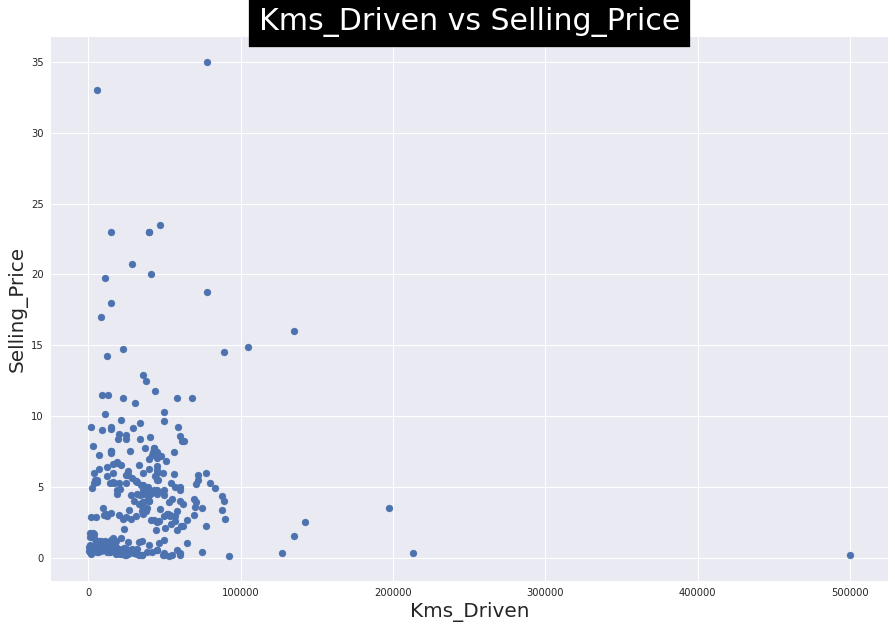

In [27]:
#نمودار کیلومتر کارکرد و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Kms_Driven"] , df["Selling_Price"])
plt.title("Kms_Driven vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Kms_Driven", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [28]:
#داده ها را براساس نوع سوخت ماشین سورت می کنیم
df.sort_values(by=["Fuel_Type"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,4,3.25,5.09,35500,CNG,Dealer,Manual,0
35,8,2.95,7.74,49998,CNG,Dealer,Manual,0
201,9,3.25,6.79,58000,Diesel,Dealer,Manual,1
74,5,4.90,8.93,83000,Diesel,Dealer,Manual,0
211,4,11.75,14.79,43535,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
134,2,0.65,0.81,11800,Petrol,Individual,Manual,0
135,4,0.65,0.74,5000,Petrol,Individual,Manual,0
136,5,0.65,1.20,23500,Petrol,Individual,Manual,0
106,5,1.35,3.45,16500,Petrol,Individual,Manual,1


<function matplotlib.pyplot.show(close=None, block=None)>

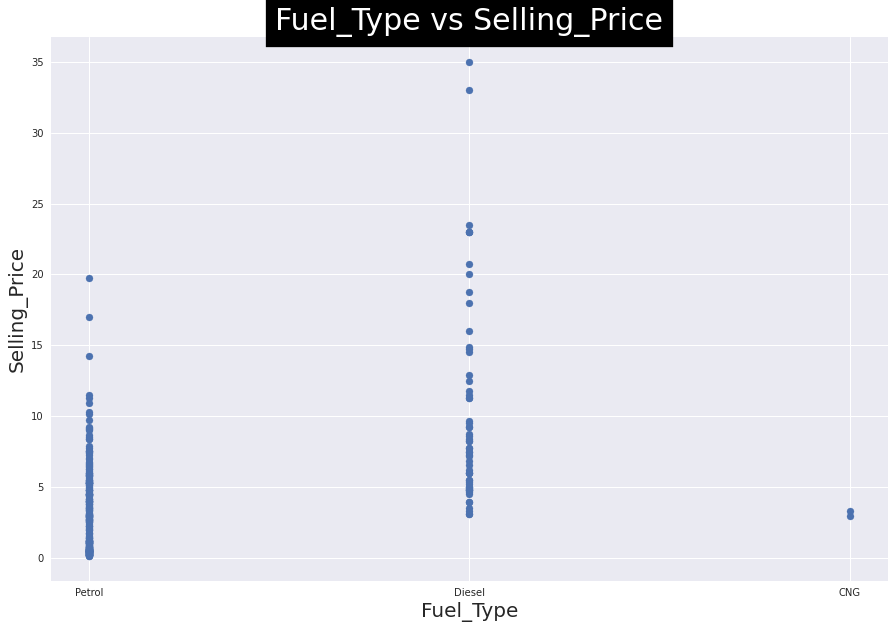

In [29]:
# نمودار نوع سوخت و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Fuel_Type"] , df["Selling_Price"])
plt.title("Fuel_Type vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Fuel_Type", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [30]:
# داده ها را براساس نوع خرید سورت می کنیم
df.sort_values(by=["Seller_Type"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.590,27000,Petrol,Dealer,Manual,0
227,8,2.55,4.430,57000,Petrol,Dealer,Manual,0
228,7,4.95,9.400,60000,Diesel,Dealer,Manual,0
229,7,3.10,6.790,52132,Diesel,Dealer,Manual,0
230,6,6.15,9.400,45000,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
171,4,0.40,0.550,6700,Petrol,Individual,Manual,0
172,5,0.40,0.640,13700,Petrol,Individual,Manual,0
173,2,0.40,0.510,1300,Petrol,Individual,Automatic,0
175,8,0.38,0.787,75000,Petrol,Individual,Manual,0


<function matplotlib.pyplot.show(close=None, block=None)>

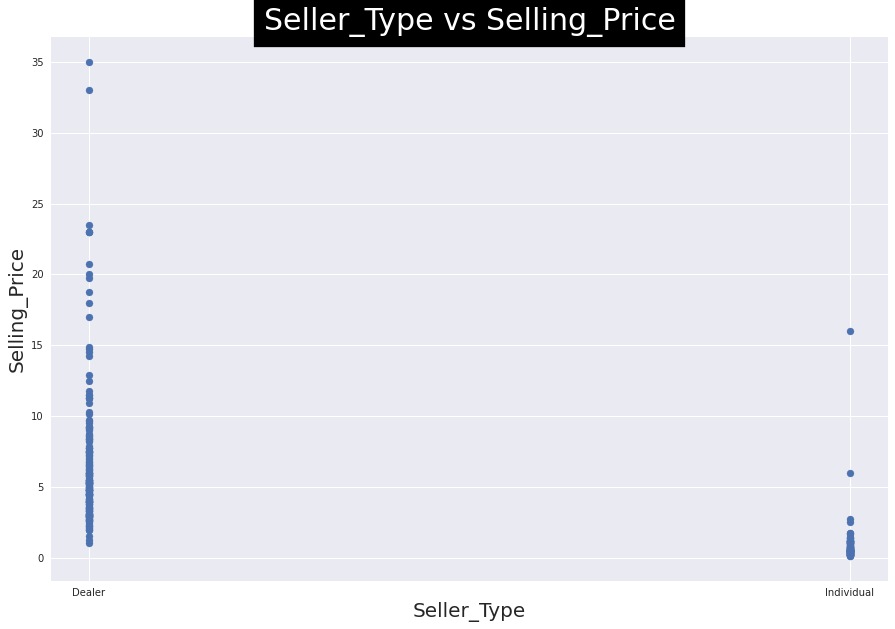

In [31]:
#نمودار نوع خرید و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Seller_Type"] , df["Selling_Price"])
plt.title("Seller_Type vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Seller_Type", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [32]:
#داده ها را براساس نوع دنده ماشین سورت می کنیم
df.sort_values(by=["Transmission"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
77,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
275,3,10.90,13.60,30753,Petrol,Dealer,Automatic,0
186,9,0.25,0.52,22000,Petrol,Individual,Automatic,0
66,2,19.75,23.15,11000,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...
112,5,1.15,2.40,7000,Petrol,Individual,Manual,0
111,3,1.15,1.50,8700,Petrol,Individual,Manual,0
110,3,1.20,1.78,6000,Petrol,Individual,Manual,0
116,6,1.10,1.47,33000,Petrol,Individual,Manual,0


<function matplotlib.pyplot.show(close=None, block=None)>

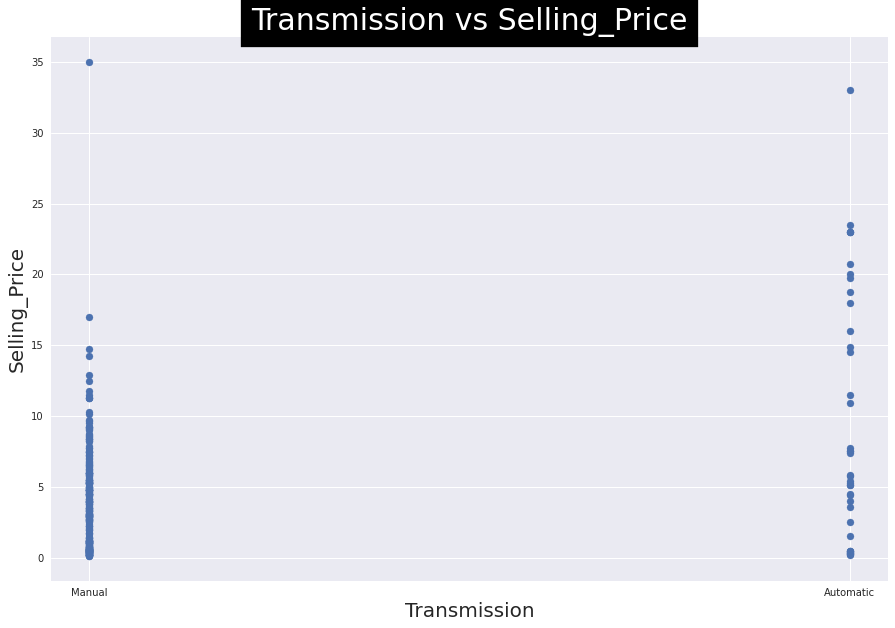

In [33]:
#نمودار نوع دنده ماشین و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Transmission"] , df["Selling_Price"])
plt.title("Transmission vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Transmission", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

In [34]:
#نمودار را براساس تعداد باری که ماشین فروخته شده سورت می کنیم
df.sort_values(by=["Owner"])

,age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
204,4,2.75,4.43,28282,Petrol,Dealer,Manual,0
203,8,2.95,4.60,53460,Petrol,Dealer,Manual,0
202,4,4.40,5.70,28200,Petrol,Dealer,Manual,0
200,13,0.10,0.75,92233,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
192,12,0.20,0.75,49000,Petrol,Individual,Manual,1
191,7,0.20,0.57,25000,Petrol,Individual,Manual,1
205,3,5.25,5.70,3493,Petrol,Dealer,Manual,1
241,4,4.75,7.13,35866,Petrol,Dealer,Manual,1


<function matplotlib.pyplot.show(close=None, block=None)>

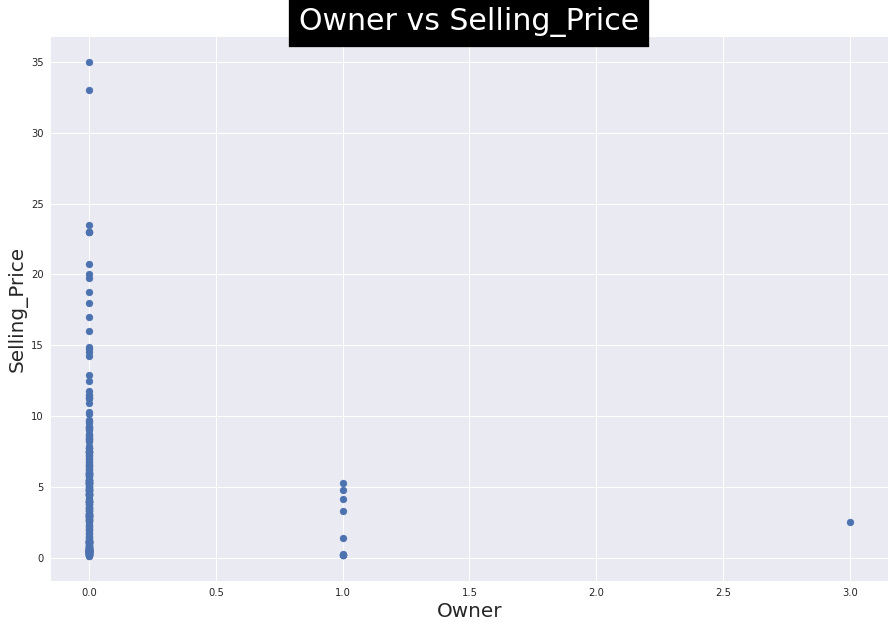

In [35]:
#نمودار بین تعداد باری که ماشین فروخته شده و قیمت را رسم می کنیم
plt.figure(figsize =(15,10))
plt.scatter(df["Owner"] , df["Selling_Price"])
plt.title("Owner vs Selling_Price",backgroundcolor='black',color='white',fontsize=30)
plt.xlabel("Owner", fontsize=20)
plt.ylabel("Selling_Price", fontsize=20)
plt.show

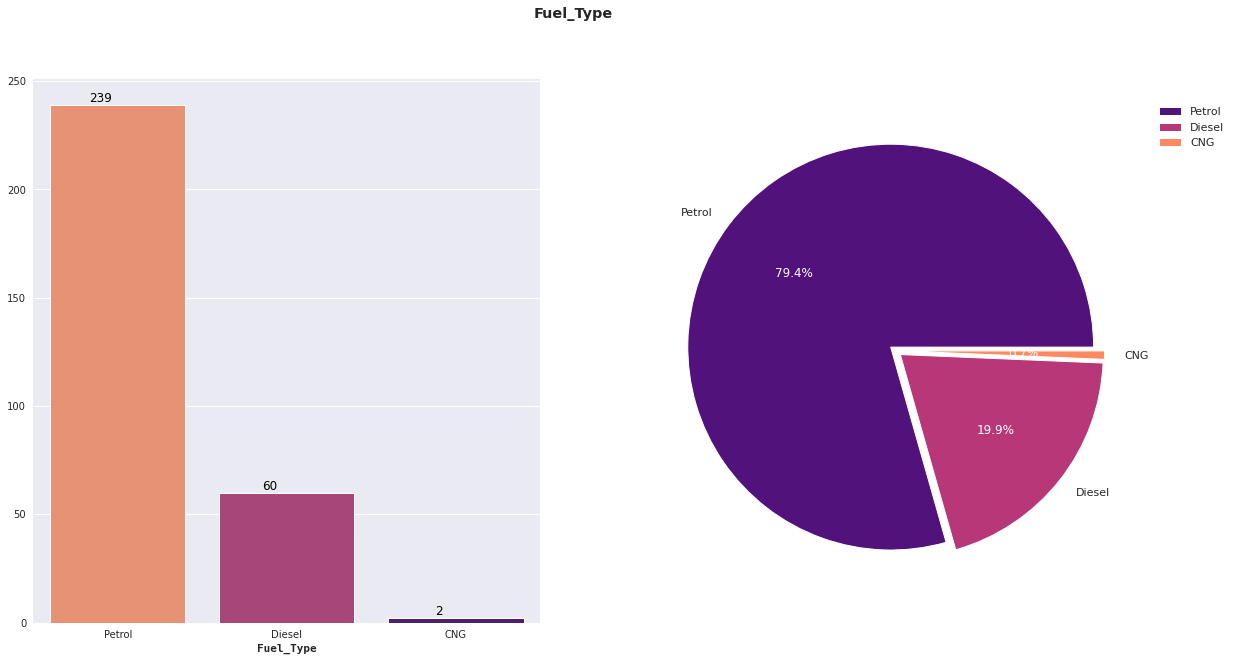

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Fuel_Type'].value_counts().index
y=df['Fuel_Type'].value_counts().values.tolist()
data = df.groupby("Fuel_Type").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Fuel_Type', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Fuel_Type'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Fuel_Type',weight = 'bold')
plt.show()

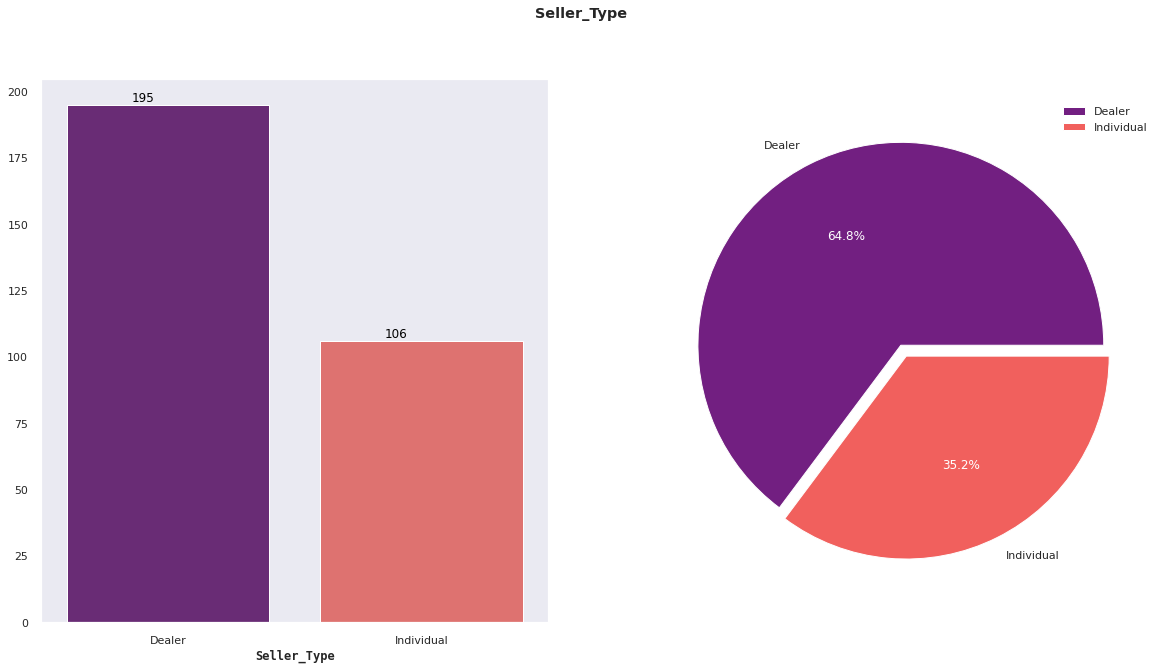

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Seller_Type'].value_counts().index
y=df['Seller_Type'].value_counts().values.tolist()
data = df.groupby("Seller_Type").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Seller_Type', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Seller_Type'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Seller_Type',weight = 'bold')
plt.show()

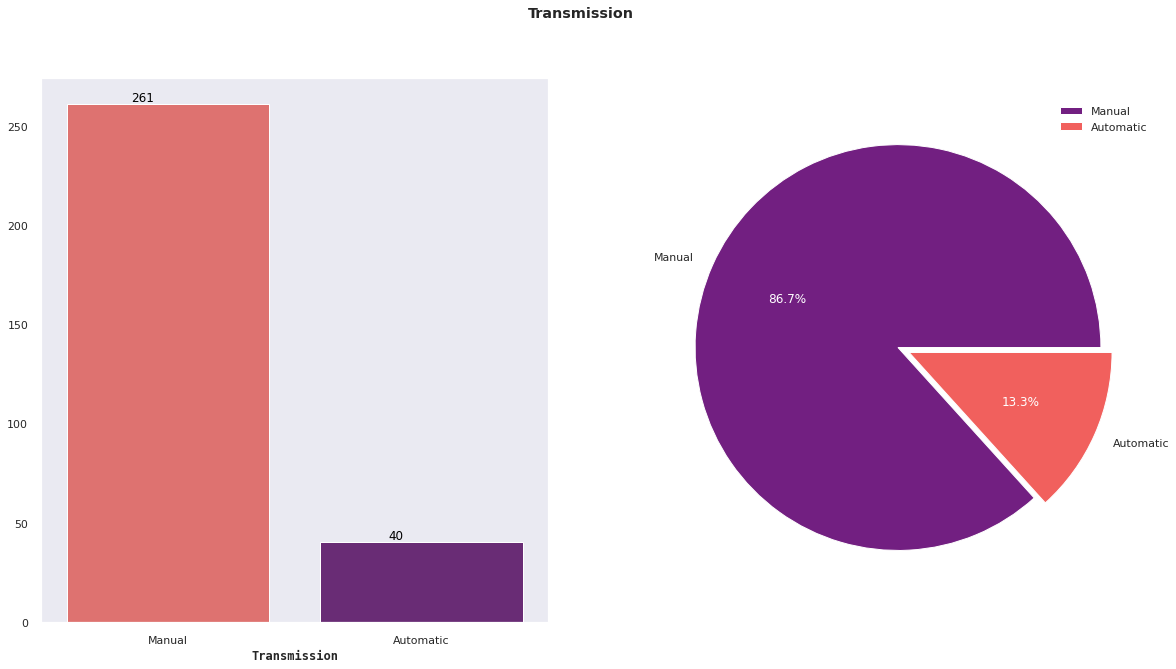

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Transmission'].value_counts().index
y=df['Transmission'].value_counts().values.tolist()
data = df.groupby("Transmission").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Transmission', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Transmission'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Transmission',weight = 'bold')
plt.show()

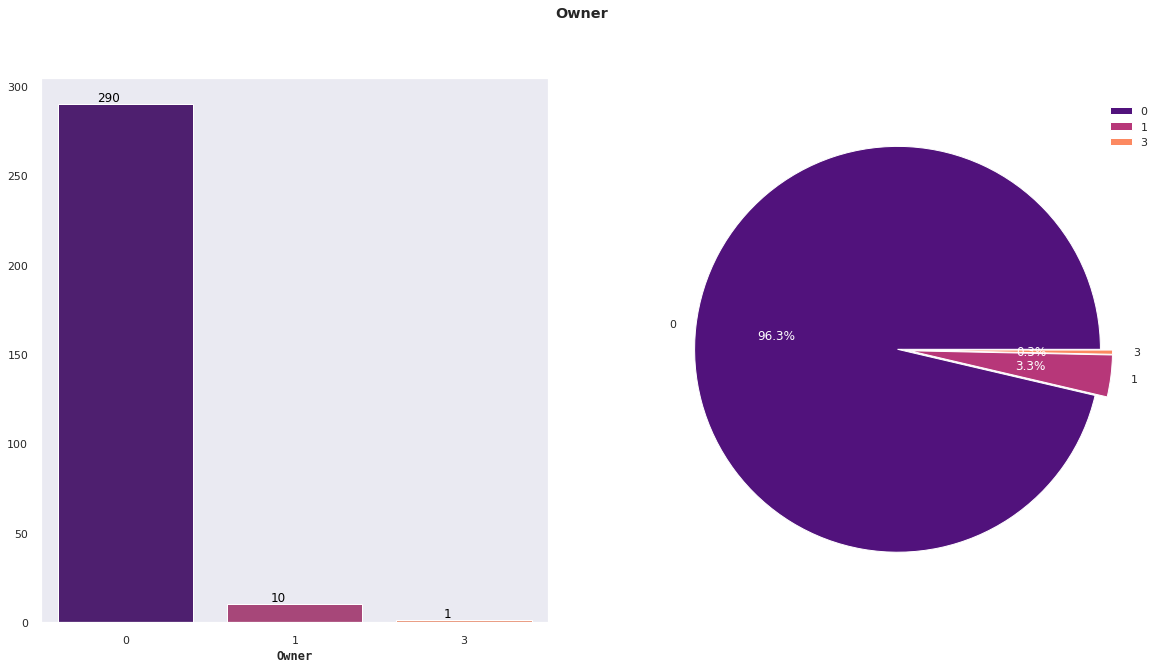

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Owner'].value_counts().index
y=df['Owner'].value_counts().values.tolist()
data = df.groupby("Owner").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Owner', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Owner'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Owner',weight = 'bold')
plt.show()

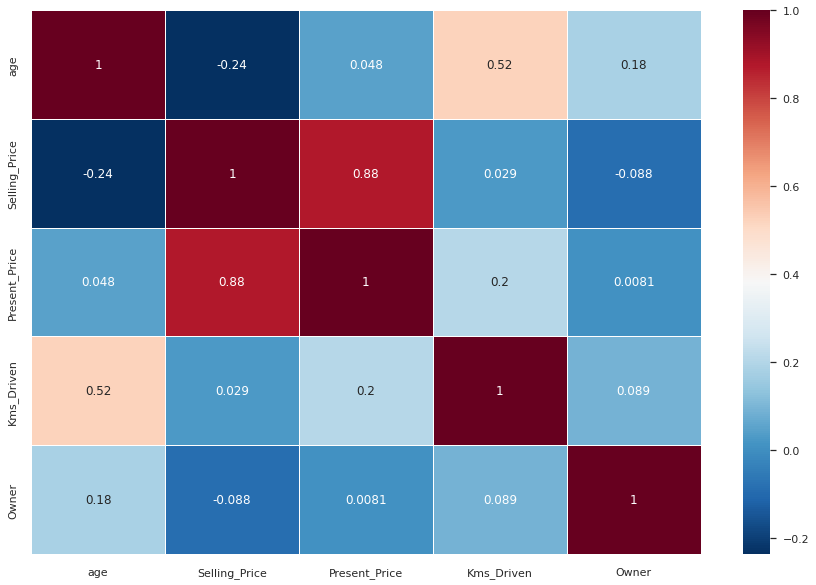

In [40]:
fig, ax = plt.subplots(figsize = (15, 10)) #Size of plot
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [41]:
#یک کپی از دیتا فریم درست می کنیم
df1 = df.copy()

In [42]:
#داده ها را از حالت کتگوریکال خارج می کنیم
df1 = df1.replace(['Manual'],'2')
df1 = df1.replace(['Automatic'],'3')

df1 = df1.replace(['Dealer'],'2')
df1 = df1.replace(['Individual'],'3')

df1 = df1.replace(['Petrol'],'2')
df1 = df1.replace(['Diesel'],'3')
df1 = df1.replace(['CNG'],'4')

In [43]:
df2 = df1.copy()

In [44]:
df3 = df2.copy()

In [45]:
#حساب کردن توان دو
Present_Price2 = df3.Present_Price**2
age2 = df3.age**2
Owner2 = df3.Owner**2


In [46]:
#حساب کردن توان سه
Present_Price3 = df3.Present_Price**3
age3 = df3.age**3

In [47]:
#اضافه کردن به دیتافریم
df3.insert(1, "age2" ,age2)
df3.insert(4, "Present_Price2" ,Present_Price2)
df3.insert(5, "Present_Price3" ,Present_Price3)
df3.insert(2, "age3" ,age3)
df3.insert(12, "Owner2" , Owner2 )

In [48]:
X = pd.DataFrame(df3 ,columns = ["age","age2","age3","Present_Price","Present_Price2","Present_Price3","Kms_Driven","Fuel_Type", "Seller_Type" , "Transmission","Owner","Owner2"])
Y = df3["Selling_Price"].values.reshape(-1,1)


In [49]:
#مراحل مدل سازی را شروع می کنیم
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [52]:
Y_pred = regressor.predict(X_test)

In [53]:
#اگر مقدار منفی شد به جای آن صفر بزار. چون قیمت منفی نداریم که
Y_pred[Y_pred<0] = 0

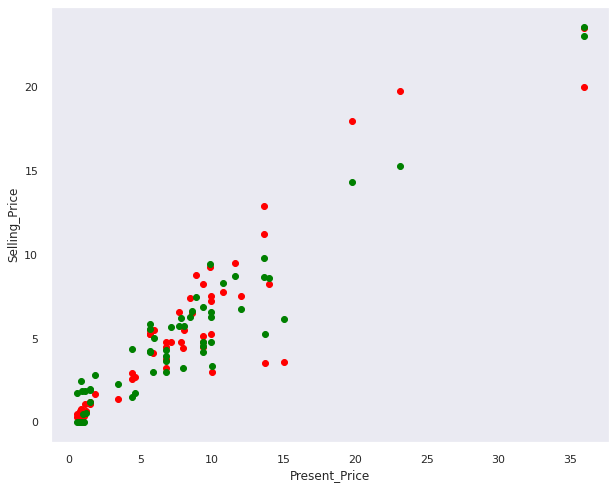

In [54]:
#ترسیم نمودار بین قیمت خرید شده و قیمت الان
plt.figure(figsize =(10,8))
a = X_test.Present_Price
b = Y_test
c = X_test.Present_Price
d= Y_pred
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.scatter(X_test.Present_Price , Y_test  , color = "red")
plt.scatter(X_test.Present_Price , Y_pred  , color = "green")

In [55]:
print(regressor.intercept_)

[5.29125828]


In [56]:
print(regressor.coef_)

[[-8.01469418e-01  1.58986424e-02  9.65145788e-04  2.83092414e-01
   1.19972292e-02 -1.19430455e-04 -4.50371831e-06  1.20564867e+00
  -1.41409210e+00  1.62819139e-01  2.58328608e+00 -1.64721425e+00]]


In [57]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score: ' ,metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error: 0.9811574640202614
Mean Squared Error: 1.739138510947717
Root Mean Squared Error: 1.3187640088157233
R2 Score:  0.9311976661562219


In [58]:
X_test.insert(1,"Y_test",Y_test)
X_test.insert(2,"Y_pred", Y_pred)
df3 = X_test.sort_values(by=["Present_Price"])

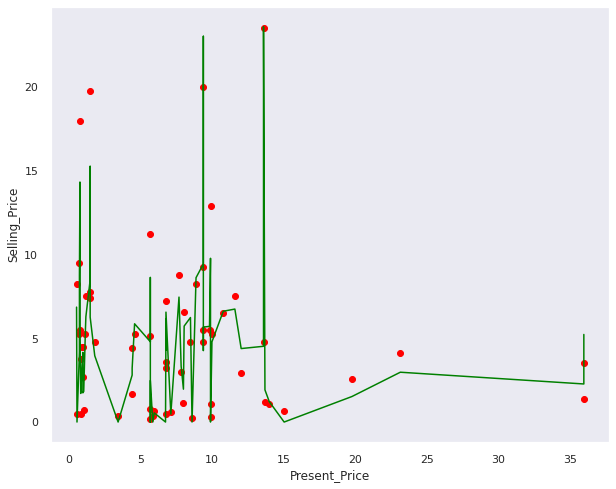

In [59]:
#بر اساس نمودار مقایسه می کنیم
plt.figure(figsize =(10,8))
a = X_test.Present_Price
b = Y_test
c = X_test.Present_Price
d= Y_pred
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.scatter(df3.Present_Price , Y_test  , color = "red")
plt.plot(df3.Present_Price , Y_pred  , color = "green")

In [60]:
#حالا مدل الگوریتم ماشین لرنینگ را صدا می کنیم
model_new= LinearRegression()

In [61]:
#طبقه بندی را انجام میدهیم
# تعداد فولد ها را 5 انتخاب کردیم
kfold_validation = KFold(4)

In [62]:
# نتیجه و امتیازدهی
results = cross_val_score(model_new, X_train, Y_train, cv = kfold_validation)
# show score
print(results)
#show mean score
print(np.mean(results))

[   0.84704822 -123.70220793    0.67805571    0.8655409 ]
-30.327890771997843


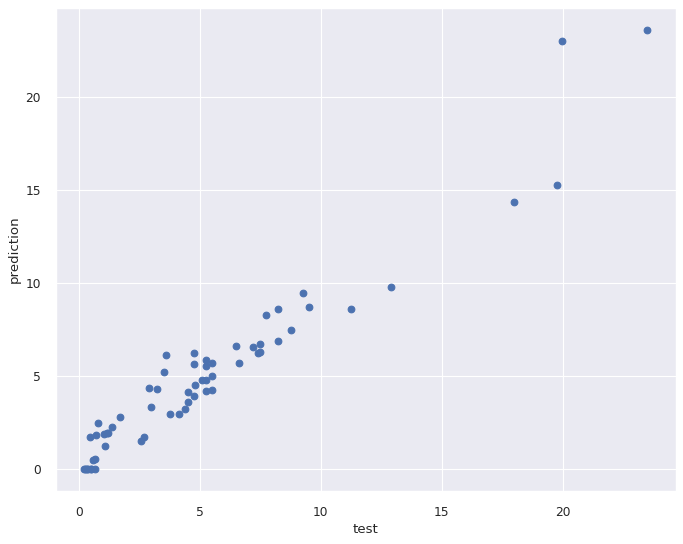

In [63]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(Y_test , Y_pred )
plt.xlabel("test")
plt.ylabel("prediction")
plt.grid()
plt.show()

In [64]:
compare = pd.DataFrame({"Actual": Y_test.flatten() , "predicted": Y_pred.flatten()})
compare 
#با توجه به اینکه اعداد به هم نزدیک هستند مدل خوب است

,Actual,predicted
0,8.25,6.861432
1,0.50,0.000000
2,5.25,4.180436
3,9.50,8.729125
4,18.00,14.332329
...,...,...
56,0.65,0.000000
57,2.55,1.522371
58,4.15,2.974673
59,1.35,2.273002
